<a href="https://colab.research.google.com/github/yashraj24007/Data-Visualization/blob/main/SalaryPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
!pip install word2number
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from word2number import w2n

  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5568 sha256=a3705e8803ffa9d2816400a1dcf4f6f02c9adb4e15c8f76308df071cfdf84b00
  Stored in directory: /root/.cache/pip/wheels/cd/ef/ae/073b491b14d25e2efafcffca9e16b2ee6d114ec5c643ba4f06
Successfully built word2number


In [ ]:
df = pd.read_csv("/content/hiring.csv")
df

In [ ]:
df.info()

In [39]:
df.experience = df.experience.fillna("zero")
df

,experience,test_score,interview_score,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [42]:
df.experience = df.experience.apply(w2n.word_to_num)
df

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [43]:
df.test_score = df.test_score.fillna(df.test_score.mean())
df

,experience,test_score,interview_score,salary
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,5,6.000000,7,60000
3,2,10.000000,10,65000
4,7,9.000000,6,70000
5,3,7.000000,10,62000
6,10,7.857143,7,72000
7,11,7.000000,8,80000


Text(0.5, 1.0, 'Experience Vs Salary')

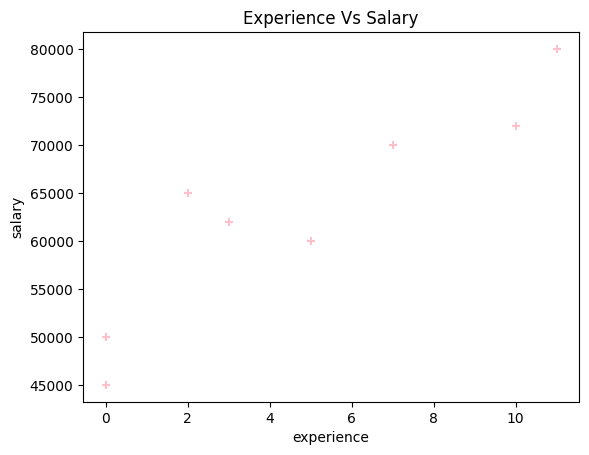

In [46]:
plt.scatter(df.experience,df.salary,color ="pink",marker="+")
plt.xlabel("experience")
plt.ylabel("salary")
plt.title("Experience Vs Salary")

In [45]:
reg = linear_model.LinearRegression()
reg.fit(df[['experience','test_score','interview_score']],df.salary)


LinearRegression()

In [48]:
print("Coefficient = ",reg.coef_[0])
print("Coefficeint = ",reg.coef_[1])
print("Coefficient = ",reg.coef_[2])
print("Slope = ",reg.intercept_)
a = float (input("Enter experience = "))
b = float (input("Enter test score = "))
c = float (input("Enter interview score = "))
print("Salary = ",reg.predict([[a,b,c]]))

Coefficient =  2827.63404314351
Coefficeint =  1912.9380305338782
Coefficient =  2196.975314104758
Slope =  17237.330313727172
Enter experience = 2
Enter test score = 7
Enter interview score = 4
Salary =  [45071.06587017]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
